In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import optimize

In [13]:
#optimize.anneal()

In [2]:
def temperature(i, max_iter):
    k = 0.1
    return k * (1 - i / max_iter)

In [27]:
def simulated_annealing(objective, area, iterations, step_size, t):
    # create initial point
    p_curr = area[:, 0] + np.random.rand(len(area)) * (area[:, 1] - area[:, 0])
    p_best = p_curr

    # evaluate initial point
    f_curr = objective(p_curr)
    f_best = f_curr

    values = np.zeros((iterations, area.shape[0]))
    values[0] = p_curr

    for i in range(1, iterations):
        p_delta = (np.random.rand(len(area)) * 2 - np.ones(len(area))) * step_size
        p_new = p_curr + p_delta
        f_new = objective(p_new)

        values[i] = p_new

        if f_new < f_curr: # <, > for min or max
            p_curr, f_curr = p_new, f_new
            if f_new < f_best:
                #print(f"x: {p_new}, y: {f_new}")
                p_best, f_best = p_new, f_new
        elif np.exp(-np.abs(f_new - f_best) / t(i, iterations)) > np.random.rand():
            p_curr, f_curr = p_new, f_new
    
    return p_best, f_best, np.swapaxes(values, 0, 1)

In [79]:
class Rosenbrock:
    area = np.asarray([[-2.0, 2.0], [-1.0, 3.0]])
    min = np.asarray([[1.0, 1.0]])
    
    def objective(x):
        return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [80]:
class Himmelblau:
    area = np.asarray([[-4.0, 4.0], [-4.0, 4.0]])
    min = np.asarray([[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]])
    
    def objective(x):
        return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [98]:
np.random.seed(15) # randomize seed

# define testfunction, objective, area
test_function = Himmelblau

objective = test_function.objective
area = test_function.area
min = test_function.min

iterations = 5000
step_size = 0.1

p_best, f_best, values = simulated_annealing(objective, area, iterations, step_size, temperature)

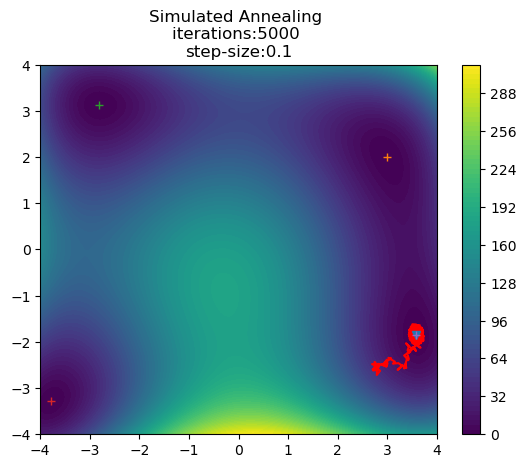

In [99]:
resolution = 100
xlist = np.linspace(area[1, 0], area[1, 1], resolution)
ylist = np.linspace(area[0, 0], area[0, 1], resolution)
Y, X = np.meshgrid(xlist, ylist)
I = np.stack([X, Y], axis=-1)

Z = np.zeros((resolution, resolution))
Z = np.apply_along_axis(objective, -1, I)

fig , ax = plt.subplots(1,1)

cp = ax.contourf(X, Y, Z, levels = 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(values[0], values[1], 'r-')
ax.plot(p_best[0], p_best[1], 'v')
for el in min:
    ax.plot(el[0], el[1], '+')
ax.set_title(f'Simulated Annealing \niterations:{iterations} \nstep-size:{step_size}')
plt.show()

In [100]:
p_best,f_best

(array([ 3.58584237, -1.8454155 ]), 0.0002390703792672446)

In [101]:
idx = np.linalg.norm(min - p_best, axis = 1).argmin()
print(np.linalg.norm(min[idx] - p_best))

0.003057331081068904
